<a href="https://colab.research.google.com/github/magdalenajanicijevic/PPPO/blob/main/PPPOIT23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanje oblika**




---




**Magdalena Janićijević IT 23/2021**

Tema: **Klasifikacija fotografija sisara**



---



# Sadržaj


1.   Uvod
2. Osnovni pojmovi
2.   Učitavanje podataka
3.  Priprema podataka
4. Podela skupa podataka
5. Učitavanje modela
6. Definisanje funkcije za treniranje modela
7. Definisanje funkcije za evaluaciju modela
8. Kvalitativna procena performansi modela
8. Kvantitativna procena performansi modela
10. Zaključak




# Uvod

Klasifikacija fotografija predstavlja nadgledani zadatak mašinskog učenja koji podrazumeva dodeljivanje oznake slici iz fiksnog skupa kategorija. To je jedan od osnovnih problema u obradi fotografija i služi kao osnova za naprednije zadatke poput detekcije objekata i segmentacije, sa širokim spektrom primena u realnom svetu. Često se koristi u oblasti medicinske dijagnoze, za praćenje i identifikaciju različitih vrsti životinja, kao i za kontrolu kvaliteta u proizvodnji. Osnovni cilj je klasifikovati glavni objekat na slici - na primer, klasifikovati da li slika prikazuje slona, žirafu ili foku, kao što je to slučaj u ovom projektu.

 Zadatak ovog projekta je klasifikacija fotografija sisara korišćenjem programskog jezika *Python*, okvira za duboko učenje *PyTorch*, i unapred treniranog modela *ResNet101* iz porodice konvolucijskih neuronskih mreža. Projekat podrazumeva obradu stvarnog skupa podataka sa slikama različitih vrsta životinja, pri čemu je cilj tačno predvideti kojoj klasi, odnosno životinjskoj vrsti, svaka slika pripada.

 Projekat obuhvata sve korake neophodne za rešavanje problema klasifikacije fotografija - učitavanje i pripremu podataka, podelu na skupove za obuku, validaciju i testiranje, prilagođavanje izlaznog sloja modela specifičnim klasama u ovom skupu, treniranje i evaluaciju modela, kao i kvalitativnu i kvantitativnu procenu performansi modela koje obezbeđuju vizuelnu i numeričku interpretaciju dobijenih rezultata. Detaljni prikaz svakog koraka je dat u nastavku.

# Osnovni pojmovi

**Mašinsko učenje**

Mašinsko učenje predstavlja sposobnost softverskog sistema da uči iz prethodnog iskustva, gde se iskustvo odnosi na skup podataka o entitetima koji su predmet učenja. Sistem koristi naučene generalizacije kako bi donosio zaključke ili predviđanja u vezi sa podacima koje ranije nije sretao.

Nadgledano mašinsko učenje obuhvata skup problema i tehnika za njihovo rešavanje u kojima program koji uči dobija skup ulaznih podataka i skup željenih/tačnih vrednosti, tako da za svaki ulazni podatak postoji željeni/tačan izlaz. Zadatak programa je da nauči kako da novom, neobeleženom ulaznom podatku dodeli tačnu izlaznu vrednost.

Kod nenadgledanog učenja, sistem pokušava da samostalno otkrije obrasce i strukture u podacima bez dostupnih oznaka. Ne postoji informacija o željenoj izlaznoj vrednosti, već program dobija samo skup ulaznih podataka.

**Deep Learning**

Duboko učenje je podskup mašinskog učenja u kojem višeslojne neuronske mreže uče iz velikih količina podataka. Metode dubokog učenja su metode učenja reprezentacija sa višestrukim nivoima reprezentacija, dobijenim kombinovanjem jednostavnih ali nelinearnih modula, gde svaki modul transformiše reprezentaciju sa jednog nivoa u reprezentaciju na višem, nešto apstraktnijem nivou.

**Neuronske mreže**

Neuronska mreža je masivno paralelni distribuirani procesor koji ima prirodnu sposobnost da skladišti iskustveno znanje i da ga koristi kada je potrebno. Obučavanje neuronske mreže se sprovodi algoritamski, kroz definisanu proceduru obučavanja, tokom koje se parametri mreže iterativno prilagođavaju sa ciljem minimizacije greške modela u odnosu na poznate izlaze. Ova procedura koristi metode optimizacije, najčešće algoritam gradijentnog spusta, u kombinaciji sa tehnikom unazadne propagacije greške, kako bi se postigle željene performanse klasifikacije.

Analiza greške podrazumeva “ručno” pregledanje primera na kojima je model pravio greške i uočavanje obrazaca u tim primerima. Pojmovi prolaska unapred (*forward pass*) i  propagacije greške unazad  (*backpropagation*) su dodatno objašnjeni u sekciji koja se odnosi na definisanje funkcije za treniranje modela. Ukratko, *forward pass* je prva faza u procesu treniranja neuronske mreže, u kojoj se ulazni podaci propagiraju kroz mrežu sloj po sloj kako bi se dobila izlazna vrednost, dok *backpropagation* predstavlja  proces učenja gde se greška propagira unazad kroz mrežu, prilagođavajući težine neuronske mreže prema gradijentu funkcije greške.

**Konvolucione neuronske mreže** (*Convolutional Neural Networks - CNN*) su vrsta dubokih neuronskih mreža koje se koriste u zadacima klasifikacije, identifikacije, predikcije i detekcije objekata, a pogodne su za rad sa ulaznim podacima
različitih dimenzija, kao što su signali, slike, video zapisi. U građu svake CNN ulaze tri različita sloja – konvolucioni sloj, sloj sažimanja i potpuno povezani sloj. Konvolucioni i sloj sažimanja služe za izdvajanje karakteristika ulaznih podataka, dok je svrha potpuno povezanog sloja donošenje krajnjeg zaključka o tim podacima, odnosno generisanje izlaznih podataka mreže. CNN su postigle najbolje rezultate na zadacima kao što su *ImageNet* izazovi.

**ResNet arhitektura**

ResNet (*Residual Network*) je tip duboke konvolutivne neuronske mreže koja se zasniva na arhitekturi rezidualnih blokova. Ključna inovacija ove mreže je uvođenje rezidualnih veza (*skip connections*) koje omogućavaju da ulazni podaci preskoče jedan ili više slojeva i direktno se dodaju na izlaz, čime se uspešno rešavaju problemi nestajućih gradijenata i degradacije performansi koji su česti kod veoma dubokih mreža.

U okviru ovog projekta korišćen je unapred istreniran model *ResNet101* iz biblioteke *PyTorch*. *ResNet101* se sastoji od 101 sloja, ali zahvaljujući svojoj rezidualnoj strukturi, omogućava treniranje velikog broja slojeva uz visoke performanse i stabilnu konvergenciju. U poređenju sa starijim modelima, kao što je VGG mreža, *ResNet* postiže bolje rezultate uz manji broj parametara, što ga čini efikasnijim kako u treniranju tako i u izvođenju. Na poznatom skupu podataka *ImageNet*, *ResNet101* ostvaruje izuzetne rezultate, sa top-5 greškom od samo 3.57%, čime značajno nadmašuje prethodne arhitekture. Ovi rezultati čine *ResNet101* model dobrim izborom za preciznu i efikasnu klasifikaciju slika.


Korišćen je skup podataka za klasifikaciju sisara koji sadrži slike 45 različitih vrsta životinja. Struktura skupa podataka je organizovana hijerarhijski po klasama, gde svaka klasa ima svoj zaseban folder koji sadrži slike pripadajućih primeraka. Ova struktura je pogodna za direktnu upotrebu sa *PyTorch-ovim ImageFolder dataset-om*, koji automatski dodeljuje oznake na osnovu naziva foldera. Dalji tekst pruža sveobuhvatan prikaz implementacije rešenja, sa fokusom na tehničke korake i postignute rezultate.

# Učitavanje biblioteka

Inicijalna konfiguracija i uvoz ključnih biblioteka koje omogućavaju rad sa podacima, unapred istreniranim modelima i evaluaciju performansi modela u okviru *PyTorch* okruženja. Modul *torch.nn* služi za kreiranje neuronskih mreža, dok *torch.optim* omogućava optimizaciju njihovih parametara tokom treniranja. *Torchvision* podržava transformacije koje se mogu koristiti za proširivanje skupa podataka za treniranje i prilagođavanje modela različitim zadacima kao što je klasifikacija slika.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
from PIL import Image, ImageDraw, ImageFont
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import random
import math
import seaborn as sborn
from sklearn.metrics import classification_report

# ***Učitavanje podataka***


---


Instaliranje biblioteke koja omogućava preuzimanje fajlova putem deljenog linka.

In [ ]:
!pip install -q gdown

Preuzimanje fajla sa odgovarajućim identifikatorom sa *Google Drive-a* i čuvanje tog fajla pod imenom ***mammals.zip*** u radnom direktorijumu.

In [ ]:
file_id = "1yP_i9Tw6DL5gxzlR3EuaUB9N3UxQ_FWj"
!gdown --id {file_id} --output mammals.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1yP_i9Tw6DL5gxzlR3EuaUB9N3UxQ_FWj
From (redirected): https://drive.google.com/uc?id=1yP_i9Tw6DL5gxzlR3EuaUB9N3UxQ_FWj&confirm=t&uuid=28a1b374-c26e-4516-aceb-b93b529a1ac3
To: /content/mammals.zip
100% 194M/194M [00:01<00:00, 160MB/s]


Raspakivanje zip fajla. Navodi se ime fajla kao i direktorijum gde će fajl biti raspakovan.

In [ ]:
!unzip -q mammals.zip -d /content/mammals_dataset

replace /content/mammals_dataset/mammals/african_elephant/african_elephant-0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/mammals_dataset/mammals/african_elephant/african_elephant-0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Provera raspakovanih fajlova i foldera na prosleđenoj putanji. Ova provera je izvršena kako bi se definisala promenljiva koja sadrži putanju do glavnog direktorijuma sa slikama, koja se u narednim koracima koristi za učitavanje podataka.

In [ ]:
!ls /content/mammals_dataset

mammals


In [ ]:
data_directory = "/content/mammals_dataset/mammals"

# **Priprema podataka**


---


Prilikom upotrebe pretreniranog modela kao što je *ResNet101* neophodno je izvršiti određene transformacije kako bi ulazi bili kompatibilni sa onima na kojima je izabrani model treniran. Pretrenirani modeli očekuju da ulazne slike budu normalizovane na isti način. Ukoliko se određeni koraci pretprocesiranja slika izostave model može pogrešno interpretirati ulaz i dati loše rezultate.

*ResNet101* model očekuje specifičan format ulaznih podataka. Očekivane su slike dimenzija 224x224, koje treba da budu učitane u opsegu [0, 1] i zatim normalizovane pomoću srednjih vrednosti i standardnih devijacija:
mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225].

Kreira se sekvenca transformacija koje će se primeniti na svaku sliku iz seta podataka. Primenjuju se sledeće transformacije:

*    *transforms.Resize()* - promena veličine slika
*    *transforms.ToTensor()* - promena u formatu podataka. *PyTorch* modeli očekuju ulaz kao tenzore u formatu (kanali, visina, širina) i vrednosti u opsegu [0.0, 1.0].
*   *transforms.Normalize()* - normalizovanje vrednosti piksela za svaki kanal tako što se srednje vrednosti oduzimaju i dele sa standardnom devijacijom. Ulazne slike treba da imaju istu statistiku kao one na kojima je model treniran.

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

*ImageFolder* je generička klasa za učitavanje slika koje su organizovane tako da svaki folder predstavlja jednu klasu. Svaka klasa mora imati sopstveni direktorijum. Potrebno je navesti putanju do radnog direktorijuma koji sadrži podfoldere koji predstavljaju klase, kao i transformacije koje će biti primenjene na slike prilikom njihovog učitavanja iz foldera.

In [ ]:
full_dataset = datasets.ImageFolder(root=data_directory, transform=transform)

# ***Podela skupa podataka***


---



Sledeći korak je podela skupa podataka na podatke za trening, validaciju i testiranje. Deljenjem skupa podataka na tri dela — trening, validacioni i test deo — osigurava se da model bude treniran na jednom skupu, podešavan na validacionom, i testiran na podacima koje nikada ranije nije video, što daje pouzdanu procenu njegove sposobnosti generalizacije. Odvajanjem skupa podataka za validaciju od skupa podataka za testiranje obezbeđuje se nepristrasna evaluacija sposobnosti modela. Tipična podela je 70% za treniranje, 15% za validaciju i 15% za testiranje, mada se ovo može razlikovati u zavisnosti od veličine skupa podataka.

Definiše se veličina skupa podataka koji se koriste za treniranje kao 70% celokupnog broja slika. Preostalih 30% slika se deli podjednako na validacioni i test skup, gde, zahvaljujući ovakvom načinu definisanja, nema gubitka podataka.

Funkcija random_split() - nasumično deli skup podataka na nepreklapajuće podskupove zadatih dužina. Na ovaj način se izbegava pristrasnost i obezbeđuje dobra generalizacija modela.

In [ ]:
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])

***Batching*** i ***Shuffling***

*Batching* - proces grupisanja uzoraka podataka u manje grupe (*batch-eve*) radi efikasnijeg treniranja modela. Manje grupe vode ka stabilnijem treniranju, ali uzrokuju neprecizne nadogradnje težina modela. Veće grupe omogućavaju bržu konvergenciju modela jer računaju prosek na većem broju uzoraka, ali traže više memorije i mogu prerano konvergirati ka suboptimalnim rešenjima.

*Shuffling* - nasumično permutovanje uzoraka podataka pre svakog prolaza kroz skup podataka. Ovo se radi da bi se poboljšala performansa modela i njegova sposobnost generalizacije.

*batch_size = 32* - definiše veličina grupe podataka od 32 slike, što predstavlja broj slika koje se obrađuju odjednom tokom jednog trening koraka.

*PyTorch DataLoader* je pomoćna klasa dizajnirana da pojednostavi učitavanje i iteriranje kroz setove podataka tokom treniranja dubokih neuronskih mreža. Ona omogućava različite operacije nad setom podatka kao što su grupisanje podataka, nasumično mešanje i procesuiranje podataka.

*DataLoader* uzima dataset kao ulaz i vraća iterabilni objekat koji može da se koristi u petlji. Ključni parametri su:


*   dataset - objekat koji predstavlja skup podataka koji sadrži uzorke i njihove labele.
*   batch_size - broj uzoraka koji se obrađuju zajedno u jednom prolazu.
* shuffle - ako je *True*, podaci se nasumično mešaju pre svakog prolaza.
* num_workers - broj podprocesa koji se koriste za paralelno učitavanje podataka.



In [ ]:
batch_size = 32
num_of_classes = len(full_dataset.classes);
train = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
val = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)
test = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

#**Učitavanje *ResNet101* modela**


---


Kada je *pretrained=True*, model vraća verziju modela prethodno treniranu na *ImageNet* skupu.

Petlja obezbeđuje da se parametri modela ne ažuriraju tokom treniranja. Zamrzavaju se prethodno naučeni slojevi i na taj način se čuvaju postojeće funkcije i smanjuje vreme i resursi potrebni za treniranje.

*num_ftrs = model.fc.in_feature*s - uzima broj ulaznih neurona poslednjeg sloja kako bi se taj sloj zamenio sa slojem koji ima odgovarajući broj izlaza. Broj izlaza je definisan brojem klasa u datasetu. Ovim je model prilagođen za specifičan problem klasifikacije.



In [ ]:
model = models.resnet101(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_of_classes)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sledi provera da li je dostupna *CUDA* platforma, tj. *NVIDIA GPU* podrška.
GPU je specijalizovan za paralelno izvođenje operacija što dramatično ubrzava treniranje neuronskih mreža. CPU je generalni procesor, znatno sporiji za ovu vrstu zadataka. Kada je *runtime type* postavljen na T4 GPU *torch.cuda.is_available()* vraća *True* i *device* postaje "*cuda*". Model se premešta u GPU memoriju i tako je omogućena brža obrada.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

**Definisanje funkcije greške i optimizatora za treniranje modela.**

Funkcija ***CrossEntropyLoss*** meri razliku između predviđenih distribucija (verovatnoća klasa) i stvarnih klasa, što omogućava treniranje klasifikacionih modela. Ova funkcija kombinuje *LogSoftmax* i *NLLLoss* u jednu funkciju. *LogSoftmax* pretvara izlaze modela u verovatnoće, dok *NLLLoss* računa negativni log verovatnoće ciljne klase. Veća vrednost ukazuje na lošu predikciju modela. Tokom treniranja cilj je smanjiti *Cross Entropy Loss* — to znači da model uči da daje preciznije i sigurnije predikcije.

**Optimizator** je algoritam koji ažurira parametre modela tokom procesa treniranja. Cilj optimizatora je da što više smanji funkciju greške pronalaskom optimalnih vrednosti parametara modela. *Adam* (*Adaptive Moment Estimation*) je algoritam za optimizaciju koji računa adaptivne stope učenja za svaki parametar. Manja vrednost *lr* znači sporije, preciznije učenje, dok veća vrednost može ubrzati učenje, ali i rizikovati preskakanje optimalnih rešenja.




In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# **Definisanje funkcije za treniranje modela**


---



Model se trenira kroz određeni broj epoha, naizmenično kroz faze treniranja i validacije. Jedna epoha podrazumeva prolazak kroz ceo skup podataka za treniranje, odnosno treniranje modela na svim grupama podataka za treniranje. Cilj je da model nauči da klasifikuje slike što preciznije, praćenjem performansi, pri čemu se čuva najbolja verzija modela. Najbolja verzija modela se čuva kako bi se sprečilo prekomerno učenje.

Prilikom treniranja parametri modela se ažuriraju putem *backpropagation* i optimizatora. ***Backpropagation*** je centralni mehanizam pomoću kojeg neuronske mreže uče. Označava povratna propagaciju greške, koja omogućava da model uči tako što se posmatra kako greška na izlazu utiče na svaki pojedinačni parametar.
Tokom validacije se procenjuju performanse modela bez ažuriranja parametara.

Funkcija prihvata sve osnovne komponente potrebne za treniranje i evaluaciju modela u zadatom broju epoha. Parametri funkcije:


*  model - model koji se trenira

* criterion - funkcija greške

* optimizer - optimizator

* train: *DataLoader* za trening podatke, koji pruža podatke u batch-evima.

* val: *DataLoader* za validacione podatke, koristi se za proveru performansi modela tokom treniranja

* num_epochs: broj epoha, podrazumevano 10



*model.train()* - model se stavlja u režim treniranja kako bi se pravilno računali gradijenti i primenjivale regularizacije. U režimu treniranja model koristi slojeve koji se ponašaju drugačije, kao što su *dropout* i *batch normalization*.

*outputs = model(inputs)* - Ulazi u model se prosleđuju kroz slojeve mreže, što se naziva ***forward pass***, dobijajući predikcije. Prolaz unapred odnosi se na proces izračunavanja izlaza neuronske mreže tako što se ulazni podaci prosleđuju kroz svaki sloj mreže redom. Svaki sloj primenjuje određenu matematičku transformaciju nad svojim ulazom i prosleđuje rezultat sledećem sloju. Ovaj proces se nastavlja sve dok se ne dobije konačni izlaz.

*loss.backward()* - ***backpropagation*** - gradijent greške se propagira od izlaza unazad kroz mrežu, omogućavajući modelu da izračuna parcijalne izvode greške u odnosu na svaki parametar.

Prikazuju se performanse modela nakon svake epohe treniranja.  Praćenje ovih metrika pomaže u proceni napretka modela.

*torch.no_grad()* - smanjuje potrošnju memorije i ubrzava evaluaciju.

In [ ]:
def train_model(model, criterion, optimizer, train, val, number_of_epochs=10):
    # promenljive koje se koriste za čuvanje najbolje validacione tačnosti
    best_accuracy = 0.0
    best_model_path = "best_model.pth"
    for epoch in range(number_of_epochs):
        print(f"Epoch {epoch+1}/{number_of_epochs}")
        print("-" * 40)
        # režim treniranja
        model.train()
        # inicijalizacija pomoćnih promenljivih za praćenje ukupnog gubitka,
        # broja ispravnih predikcija i ukupnog broja uzoraka tokom epohe
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for inputs, labels in train:
            inputs, labels = inputs.to(device), labels.to(device)
            # čišćenje prethodnih gradijenata pre izračunavanja novih
            optimizer.zero_grad()
            # forward pass
            outputs = model(inputs)
            # računa se vrednost funkcije greške
            loss = criterion(outputs, labels)
            # backpropagation
            loss.backward()
            # težine modela se prilagođavaju da bi se smanjio gubitak
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            # izlaz modela se prevodi u konkretne predikcije klasa
            preds = outputs.argmax(dim=1)
            # broji se koliko je predikcija tačno klasifikovano
            running_corrects += torch.sum(preds == labels)
            total += labels.size(0)

        # izračunavanje prosečnog gubitka i tačnosti na trening skupu
        # podataka
        epoch_loss = running_loss / total
        epoch_acc = running_corrects.double() / total
        print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        model.eval()
        # inicijalizacija pomoćnih promenljivih za praćenje ukupnog gubitka,
        # broja ispravnih predikcija i ukupnog broja uzoraka
        val_loss = 0.0
        val_corrects = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                preds = outputs.argmax(dim=1)
                val_corrects += torch.sum(preds == labels)
                val_total += labels.size(0)
        # izračunavanje prosečnog gubitka i tačnosti na validacionom skupu
        # podataka
        val_epoch_loss = val_loss / val_total
        val_epoch_acc = val_corrects.double() / val_total
        print(f"Val Loss: {val_epoch_loss:.4f} Acc: {val_epoch_acc:.4f}")
        # čuvanje modela koji daje bolje rezultate prilikom evaluacije
        if val_epoch_acc > best_accuracy:
            best_accuracy = val_epoch_acc
            torch.save(model.state_dict(), best_model_path)
        print()
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    # varaća se model sa najboljim performansama dobijenim tokom validacije
    model.load_state_dict(torch.load(best_model_path))
    return model


Najbolji rezultat može da se uoči na epohi 8. Od epohe 9 model postaje previše specifičan za skup podataka što se uočava iz toga da *Val Loss* počinje da raste, dok *Train Loss* počinje da se smanjuje.

In [ ]:
trained_model = train_model(model, criterion, optimizer, train, val, number_of_epochs=10)

Epoch 1/10
----------------------------------------
Train Loss: 0.7590 Acc: 0.8366
Val Loss: 0.2632 Acc: 0.9355

Epoch 2/10
----------------------------------------
Train Loss: 0.2471 Acc: 0.9336
Val Loss: 0.2079 Acc: 0.9467

Epoch 3/10
----------------------------------------
Train Loss: 0.1894 Acc: 0.9437
Val Loss: 0.1932 Acc: 0.9500

Epoch 4/10
----------------------------------------
Train Loss: 0.1584 Acc: 0.9536
Val Loss: 0.2165 Acc: 0.9370

Epoch 5/10
----------------------------------------
Train Loss: 0.1368 Acc: 0.9595
Val Loss: 0.1961 Acc: 0.9418

Epoch 6/10
----------------------------------------
Train Loss: 0.1277 Acc: 0.9601
Val Loss: 0.2228 Acc: 0.9370

Epoch 7/10
----------------------------------------
Train Loss: 0.1065 Acc: 0.9681
Val Loss: 0.1875 Acc: 0.9457

Epoch 8/10
----------------------------------------
Train Loss: 0.0855 Acc: 0.9748
Val Loss: 0.1677 Acc: 0.9559

Epoch 9/10
----------------------------------------
Train Loss: 0.0817 Acc: 0.9749
Val Loss: 0.2

# **Definisanje funkcije za evaluaciju modela**



---



Evaluacija modela podrazumeva merenje tačnosti treniranog modela na skupu podataka za testiranje. To je krucijalan korak za razumevanje koliko dobro model generalizuje nove podatke koji mu prethodno nisu saopšteni. Evaluacija modela na odvojenom test skupu daje nepristrasnu procenu performansi modela.

*model.eval()* - model se stavlja u režim evaluacije čime se isključuju slojevi koji se ponašaju različito tokom treninga i testiranja, poput *Dropout-a* i *Batch Normalization-a*. Na taj način se obezbeđuju tačne metrike prilikom evaluacije modela.

*torch.no_grad()* - onemogućava računanje gradijenata koji su potrebni samo tokom treniranja. Prilikom evaluacije modela ili pravljenja predikcija moguće je isključiti praćenje gradijenata čime se smanjuje potrošnja memorije.

**Test Accuracy: 0.9438** - tačnost od 0.9438 znači da je model tačno klasifikovao oko 94.38% primera u test skupu. Kako set podataka ima veliki broj klasa, navedena tačnost se može smatrati dobrim rezultatom koji ukazuje na to da model dobro generalizuje nove podatke.

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            # izračunavanje broja tačnih predikcija poređenjem preds sa
            # labels i sabiranjem svih tačnih klasifikacija
            corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    # izračunavanje tačnosti
    acc = corrects.double() / total
    print(f"Test Accuracy: {acc:.4f}")

evaluate_model(trained_model, test)


Test Accuracy: 0.9438


In [ ]:
class_names = full_dataset.classes


# ***Kvalitativna procena performansi modela***


---



Funkcija *visualize_model()* omogućava prikaz rezultata modela na uzorcima iz skupa podataka za treniranje. Osnovna ideja je da se za svaki uzorak, odnosno sliku, prikaže prava klasa, kao i predviđena klasa koju mu je model dodelio. Prikazuje se i procenat poverenja - mera sigurnosti modela u svoju predikciju, koja je izračunata korišćenjem *softmat* funkcije. *Softmax* funkcija se često koristi za predstavljanje kategorijalne raspodele nad predviđenim klasama.

Boja naslova slike menja se u zeleno ako je predikcija tačna, ili crveno ako je netačna.

Prikazivanje predviđenih oznaka zajedno sa stvarnim oznakama i procentima poverenja na uzorcima slika pomaže u kvalitativnoj proceni snaga i slabosti modela. ***Ukoliko model daje visok procenat poverenja za pogrešnu predikciju, to može biti indikator da je potrebno dodatno trenirati model ili proveriti skup podataka.***

In [ ]:
def visualize_model(model, dataloader, class_names, num_images=9):
    model.eval()
    dataset = dataloader.dataset

    indices = random.sample(range(len(dataset)), num_images)
    samples = [dataset[i] for i in indices]
    images, labels = zip(*samples)

    inputs = torch.stack(images).to(device)
    labels = torch.tensor(labels).to(device)

    with torch.no_grad():
        outputs = model(inputs)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        confs, preds = torch.max(probs, 1)

        cols = 3
        rows = math.ceil(num_images / cols)

        plt.figure(figsize=(5 * cols, 4 * rows))

        for i in range(num_images):
            ax = plt.subplot(rows, cols, i + 1)
            ax.axis("off")

            is_correct = preds[i] == labels[i]
            title_color = "green" if is_correct else "red"

            true_label = class_names[labels[i]]
            pred_label = class_names[preds[i]]
            confidence = confs[i].item() * 100

            ax.set_title(
                f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)",
                fontsize=11,
                color=title_color
            )

            img = inputs[i].cpu().numpy().transpose((1, 2, 0))
            img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img = np.clip(img, 0, 1)
            plt.imshow(img)

        plt.tight_layout(pad=3.0)
        plt.show()

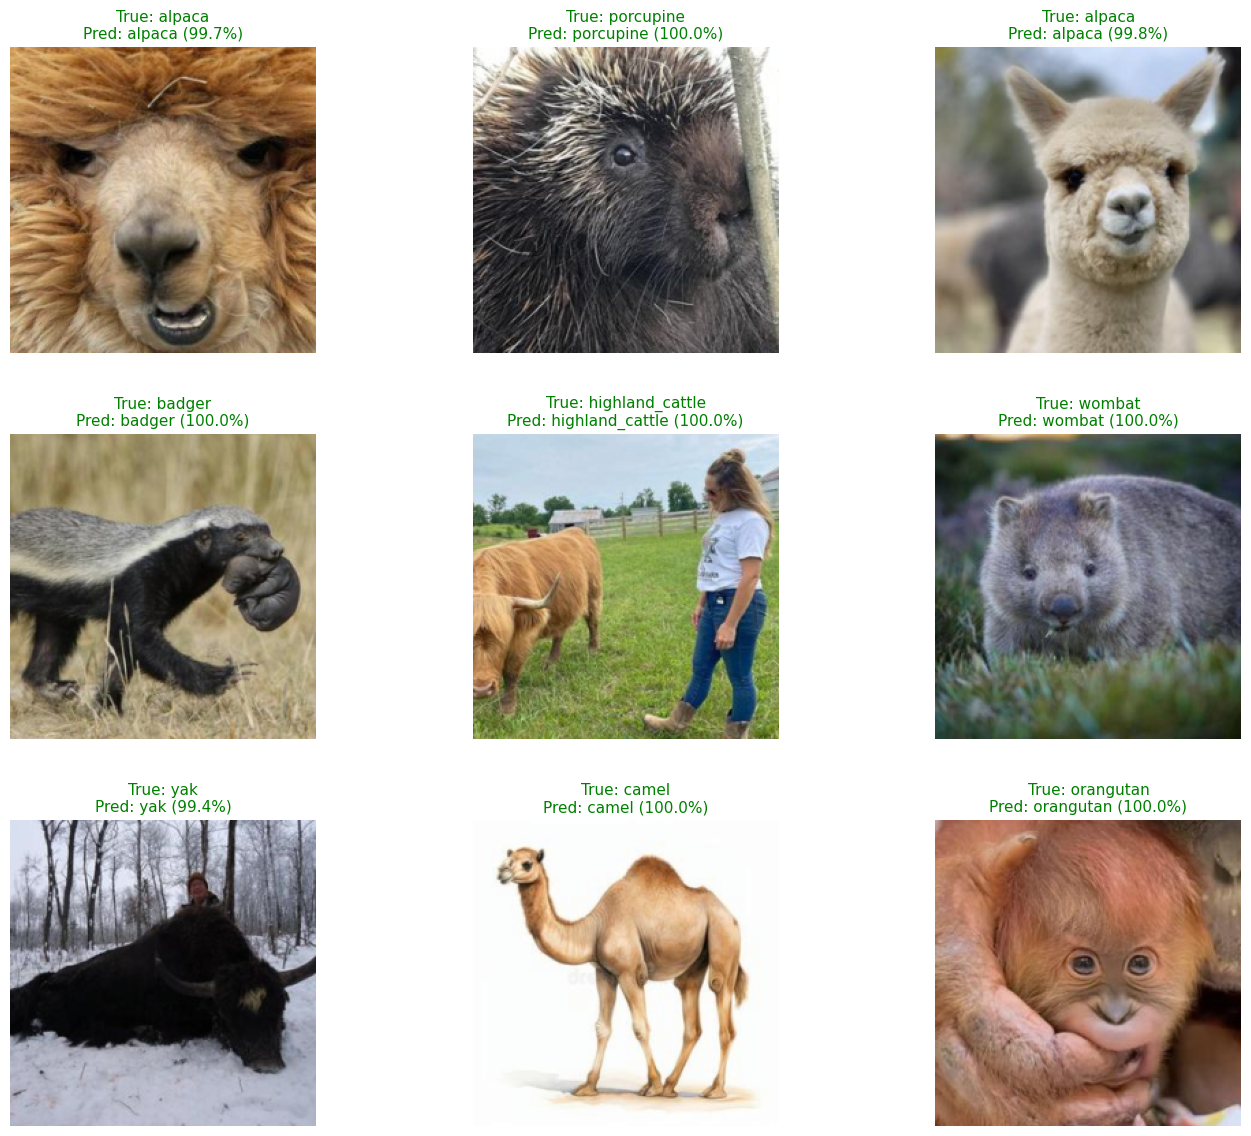

In [ ]:
visualize_model(trained_model, test, class_names)

# ***Kvantitativna procena performansi modela***


---
Funkcija *print_classification_report()* ispisuje klasifikacioni izveštaj koji sadrži metrike poput preciznosti, odziva, *f1-score*, kao i broja primera po klasi.
* Preciznost je odnos tačno predviđenih pozitivnih primera prema ukupnom broju primera koje je model označio kao pozitivne.
* Odziv je odnos tačno predviđenih pozitivnih primera prema ukupnom broju stvarnih pozitivnih primera.
* *F1-score* je sredina između preciznosti i odziva. Izračunava se po formuli: 2 * (preciznost * odziv) / (preciznost + odziv).

Iz izveštaja se može videti i da se klasifikuje 2064 slika u 45 klasa sisara. Kako je prethodno navedeno, tačnost od 94% se može interpretirati kao veoma visoka, jer set podataka sadrži veliki broj klasa.

Klase *artic_fox* i *camel* su modelu najlakše za prepoznavanje, što se može uočiti iz vrednosti *precision* = *recall* = 1.00. Suprotno, klase *seal* i *blue_whale* su klase sa najslabijim rezultatima. Niska preciznost ukazuje na često pogrešno identifikovanje druge klase kao posmatranih, dok nizak odziv govori o ne prepoznavanju stvarnih uzoraka ovih klasa. Nizak F1 implicira da su i preciznost i odziv loši.

Manja tačnost se primećuje kod klasa čiji uzorci su vizuelno slični uzorcima iz drugih klasa ili klasa koje imaju manji broj uzoraka za treniranje.

*F1-score* manji od 0.90 ukazuje na neuravnotežene greške modela.

*Macro average* računa prosečnu vrednost metrika tako što uzima jednaku težinu za svaku klasu, što znači da se sve klase tretiraju jednako bez obzira na broj uzoraka u pojedinačnoj klasi. Model ima konzistentnu efikasnost u svim klasama.

*Weighted average* računa prosek metrika tako što ih ponderiše prema broju uzoraka u svakoj klasi. Ova metrika je korisna kada podaci imaju neuravnotežene klase. Model nije pristrasan prema klasama sa većim brojem uzoraka.





In [ ]:
def print_classification_report(model, dataloader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print(classification_report(all_labels, all_preds, target_names=class_names))

In [ ]:
print_classification_report(trained_model, test, class_names)

                  precision    recall  f1-score   support

african_elephant       1.00      0.97      0.98        66
          alpaca       0.98      0.93      0.96        61
  american_bison       0.96      0.98      0.97        50
        anteater       0.97      0.90      0.94        41
      arctic_fox       1.00      1.00      1.00        43
       armadillo       0.98      0.98      0.98        54
          baboon       0.98      0.94      0.96        53
          badger       0.98      0.88      0.93        50
      blue_whale       0.97      0.82      0.89        38
      brown_bear       0.98      0.98      0.98        42
           camel       1.00      1.00      1.00        32
         dolphin       0.86      0.93      0.89        40
         giraffe       0.98      0.98      0.98        48
       groundhog       0.92      1.00      0.96        35
 highland_cattle       0.91      0.98      0.94        50
           horse       0.95      1.00      0.98        42
          jac

# Zaključak

U ovom projektu je predstavljena primena dubokog učenja za klasifikaciju fotografija sisara korišćenjem unapred istreniranog modela *ResNet101* u okviru *PyTorch* biblioteke. Primenjena metoda zasniva se na zameni izlaznog sloja modela *ResNet101* kako bi odgovarao ciljanom broju klasa, pri čemu su svi prethodni slojevi zamrznuti radi očuvanja prethodno stečenog znanja. Pored toga, izvršeno je pretprocesiranje podataka uključujući promenu dimenzija slika, normalizaciju i transformacije u tenzore.

Kroz pripremu i podelu podataka, preko prilagođavanja modela i njegovog treniranja, do evaluacije performansi, ostvarena je visoka tačnost klasifikacije od 94%, što potvrđuje efikasnost i pouzdanost izabrane arhitekture.

Rezultati treninga i evaluacije pokazali su da *ResNet101* postiže pouzdanu tačnost, kako na trening tako i na skupovima podataka za validaciju i testiranje, čime je prikazana sposobnost modela da generalizuje i neviđene podatke.
Kvantitativna analiza pokazala je da model postiže dosledne rezultate u različitim klasama, sa dobrim vrednostima preciznosti, odziva i *F1score-a* za većinu klasa. Primećena su manja odstupanja kod klasa sa vizuelno sličnim primerima ili manjim brojem uzoraka, što je u skladu sa očekivanjima u zadacima višeklasne klasifikacije.

Rezultati potvrđuju da je primena ResNet101 arhitekture efikasno rešenje za složene zadatke višeklasne klasifikacije slika.

# **Literatura**



1.   Materijali sa vežbi - vežbe 08
2. https://docs.pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
7. Goodfellow, Ian, Yoshua Bengio, i Aaron Courville. Deep Learning. MIT Press, 2016. Dostupno na: http://www.deeplearningbook.org
2. https://scindeks-clanci.ceon.rs/data/pdf/0040-2176/2023/0040-21762304433P.pdf
2. https://ai.fon.bg.ac.rs/wp-content/uploads/2016/10/ML_intro_2016.pdf
2. https://medium.com/@siddheshb008/resnet-architecture-explained-47309ea9283d
2. https://www.vizuaranewsletter.com/p/resnet-the-architecture-that-changed
3.   https://docs.pytorch.org/vision/stable/models/generated/torchvision.models.resnet101.html
4. https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
5. https://www.geeksforgeeks.org/deep-learning/pytorch-dataloader/
8. https://www.statology.org/sklearn-classification-report/
8. https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn
